### DEBUGing torsion tree issue

#### Step 1 - Load ligands

In [1]:
from dinc_ensemble import *
from dinc_ensemble.ligand.core.convert_molecule import *
from dinc_ensemble.ligand.fragment.fragment import DINCFragment
from dinc_ensemble.ligand.fragment.draw import draw_fragment
from dinc_ensemble.parameters.fragment import  *


In [2]:
from glob import glob
from pathlib import Path
import pandas as pd
root_dir = "../data/pdbbind_test_ligands/"
all_ligands = glob(root_dir+"*.mol2")
lig_paths = [Path(l) for l in all_ligands]
lig_pdb_ids = [p.stem.split("_")[0] for p in lig_paths]
lig_pdb_dofs = [int(p.stem.split("_")[-1]) for p in lig_paths]
inputs_df = pd.DataFrame({
    "pdb_id" : lig_pdb_ids,
    "lig_dof" : lig_pdb_dofs,
    "lig_path" : lig_paths
})
inputs_df["rec_path"] = inputs_df.apply(lambda row: root_dir+"{}_receptor_dof_{}.pdb".format(row.pdb_id, row.lig_dof), 
                                        axis=1)
inputs_df

,pdb_id,lig_dof,lig_path,rec_path
0,1a61,12,../data/pdbbind_test_ligands/1a61_ligand_dof_1...,../data/pdbbind_test_ligands/1a61_receptor_dof...
1,5a4l,0,../data/pdbbind_test_ligands/5a4l_ligand_dof_0...,../data/pdbbind_test_ligands/5a4l_receptor_dof...
2,3d14,4,../data/pdbbind_test_ligands/3d14_ligand_dof_4...,../data/pdbbind_test_ligands/3d14_receptor_dof...
3,6bhi,30,../data/pdbbind_test_ligands/6bhi_ligand_dof_3...,../data/pdbbind_test_ligands/6bhi_receptor_dof...
4,3ckt,14,../data/pdbbind_test_ligands/3ckt_ligand_dof_1...,../data/pdbbind_test_ligands/3ckt_receptor_dof...
...,...,...,...,...
148,5dy5,11,../data/pdbbind_test_ligands/5dy5_ligand_dof_1...,../data/pdbbind_test_ligands/5dy5_receptor_dof...
149,1l5q,0,../data/pdbbind_test_ligands/1l5q_ligand_dof_0...,../data/pdbbind_test_ligands/1l5q_receptor_dof...
150,2xzq,34,../data/pdbbind_test_ligands/2xzq_ligand_dof_3...,../data/pdbbind_test_ligands/2xzq_receptor_dof...
151,2pjt,10,../data/pdbbind_test_ligands/2pjt_ligand_dof_1...,../data/pdbbind_test_ligands/2pjt_receptor_dof...


### Step 2 - Pick a ligand

In [3]:
inputs_df[inputs_df["lig_dof"]==40]

,pdb_id,lig_dof,lig_path,rec_path
32,1h24,40,../data/pdbbind_test_ligands/1h24_ligand_dof_4...,../data/pdbbind_test_ligands/1h24_receptor_dof...
51,4u91,40,../data/pdbbind_test_ligands/4u91_ligand_dof_4...,../data/pdbbind_test_ligands/4u91_receptor_dof...
132,4qyo,40,../data/pdbbind_test_ligands/4qyo_ligand_dof_4...,../data/pdbbind_test_ligands/4qyo_receptor_dof...


In [4]:
sele_index = 32
lig_path = inputs_df.iloc[sele_index].lig_path

### Step 3 - Use dinc to load ligand and fragment

In [5]:

def assign_new_names(atoms):
    
    unique_atoms_cnt = {}
    print("ASSIGNING NEW NAMES")
    for i, at in enumerate(atoms):
        print(at.name)
        # make sure at.name does not have special characters, if it does avoid them
        #if has_special_characters(at.name):
        #    raise ValueError("Molecule has atom name with special characters: {}".format(at.name))
        name = at.name
        alpha_name = ""
        numeric_name = ""
        for c in alpha_name:
            if c.isalpha():
                alpha_name.append(c)
            if c.isnumeric():
                numeric_name.append(c)
                
        if alpha_name not in unique_atoms_cnt:
            unique_atoms_cnt[name] = 0
        else:
            print("not unique")
            cnt = unique_atoms_cnt[alpha_name] 
            new_name = alpha_name + str(cnt)
            print(new_name)
            if len(new_name) <=3:
                at.name = new_name
                unique_atoms_cnt[alpha_name] = cnt+1
            # if atom name is longer than 3 characters this can be a problem
            else:
                sec_char = new_name[1]
                # if second char is alpha we can increase it
                # if second char is numeric - we reached cnt 99 for given name probably - switch to chars
                if sec_char.isnumeric():
                    sec_char = chr(ord("A")-1)
                
                cnt = 10
                while cnt >= 9:
                    new_sec_char = chr(ord(sec_char)+1)
                    new_name = new_name[0]+new_sec_char
                    if new_sec_char in unique_atoms_cnt:
                        cnt = unique_atoms_cnt[cnt]
                    else:
                        cnt = 0
                
                if new_name not in unique_atoms_cnt:
                    at.name = new_name
                    unique_atoms_cnt[new_name] = 0
                else:    
                    at.name = new_name + str(cnt)
                    unique_atoms_cnt[new_name] = cnt+1
                        
            
        print(at.name)
    print(unique_atoms_cnt)
    return atoms

In [6]:
from MolKit import Read as MolKitRead

In [7]:
lig = MolKitRead(str(lig_path))

In [12]:
assign_new_names(lig.allAtoms)

ASSIGNING NEW NAMES
N
N
CA
CA
C
C
O
O
CB
CB
CG
CG
CD
CD
N
not unique
N0
N0
CA
not unique
CA0
CA0
C
not unique
C0
C0
O
not unique
O0
O0
CB
not unique
CB0
CB0
CG1
CG1
CG2
CG2
N
not unique
N1
N1
CA
not unique
CA1
CA1
C
not unique
C1
C1
O
not unique
O1
O1
CB
not unique
CB1
CB1
CG
not unique
CG0
CG0
CD
not unique
CD0
CD0
CE
CE
NZ
NZ
N
not unique
N2
N2
CA
not unique
CA2
CA2
C
not unique
C2
C2
O
not unique
O2
O2
CB
not unique
CB2
CB2
CG
not unique
CG1
CG1
CD
not unique
CD1
CD1
NE
NE
CZ
CZ
NH1
NH1
NH2
NH2
N
not unique
N3
N3
CA
not unique
CA3
CA3
C
not unique
C3
C3
O
not unique
O3
O3
CB
not unique
CB3
CB3
CG
not unique
CG2
CG2
CD
not unique
CD2
CD2
NE
not unique
NE0
NE0
CZ
not unique
CZ0
CZ0
NH1
not unique
NH10
NI
NH2
not unique
NH20
NI0
N
not unique
N4
N4
CA
not unique
CA4
CA4
C
not unique
C4
C4
O
not unique
O4
O4
CB
not unique
CB4
CB4
CG
not unique
CG3
CG3
CD1
CD1
CD2
CD2
N
not unique
N5
N5
CA
not unique
CA5
CA5
C
not unique
C5
C5
O
not unique
O5
O5
CB
not unique
CB5
CB5
CG
not unique
CG4
CG4

<AtomSet instance> holding 168 Atom, "1h24_ligand_dof_40:default:PRO..."

In [8]:
[j for i, j in enumerate(lig.allAtoms) if "C" in j.name]

[<Atom instance> 1h24_ligand_dof_40:default:PRO1:CA,
 <Atom instance> 1h24_ligand_dof_40:default:PRO1:C,
 <Atom instance> 1h24_ligand_dof_40:default:PRO1:CB,
 <Atom instance> 1h24_ligand_dof_40:default:PRO1:CG,
 <Atom instance> 1h24_ligand_dof_40:default:PRO1:CD,
 <Atom instance> 1h24_ligand_dof_40:default:VAL1:CA,
 <Atom instance> 1h24_ligand_dof_40:default:VAL1:C,
 <Atom instance> 1h24_ligand_dof_40:default:VAL1:CB,
 <Atom instance> 1h24_ligand_dof_40:default:VAL1:CG1,
 <Atom instance> 1h24_ligand_dof_40:default:VAL1:CG2,
 <Atom instance> 1h24_ligand_dof_40:default:LYS1:CA,
 <Atom instance> 1h24_ligand_dof_40:default:LYS1:C,
 <Atom instance> 1h24_ligand_dof_40:default:LYS1:CB,
 <Atom instance> 1h24_ligand_dof_40:default:LYS1:CG,
 <Atom instance> 1h24_ligand_dof_40:default:LYS1:CD,
 <Atom instance> 1h24_ligand_dof_40:default:LYS1:CE,
 <Atom instance> 1h24_ligand_dof_40:default:ARG1:CA,
 <Atom instance> 1h24_ligand_dof_40:default:ARG1:C,
 <Atom instance> 1h24_ligand_dof_40:default:ARG1

In [8]:
# load ligand
ligand_dinc_mol = load_ligand(str(lig_path))

N
CA
C
O
CB
CG
CD
N
not unique
N0
CA
not unique
CA0
C
not unique
C0
O
not unique
O0
CB
not unique
CB0
CG1
CG2
N
not unique
N1
CA
not unique
CA1
C
not unique
C1
O
not unique
O1
CB
not unique
CB1
CG
not unique
CG0
CD
not unique
CD0
CE
NZ
N
not unique
N2
CA
not unique
CA2
C
not unique
C2
O
not unique
O2
CB
not unique
CB2
CG
not unique
CG1
CD
not unique
CD1
NE
CZ
NH1
NH2
N
not unique
N3
CA
not unique
CA3
C
not unique
C3
O
not unique
O3
CB
not unique
CB3
CG
not unique
CG2
CD
not unique
CD2
NE
not unique
NE0
CZ
not unique
CZ0
NH1
not unique
NH10
NH2
not unique
NH20
N
not unique
N4
CA
not unique
CA4
C
not unique
C4
O
not unique
O4
CB
not unique
CB4
CG
not unique
CG3
CD1
CD2
N
not unique
N5
CA
not unique
CA5
C
not unique
C5
O
not unique
O5
CB
not unique
CB5
CG
not unique
CG4
OD1
OD2
N
not unique
N6
CA
not unique
CA6
C
not unique
C6
O
not unique
O6
CB
not unique
CB6
CG
not unique
CG5
CD1
not unique
CD10
CD2
not unique
CD20
N
not unique
N7
CA
not unique
CA7
C
not unique
C7
O
not unique
O7
CB
not

In [13]:
list(ligand_dinc_mol.atoms.index)

['N',
 'CA',
 'C',
 'O',
 'CB',
 'CG',
 'CD',
 'H1',
 'H2',
 'N0',
 'CA0',
 'C0',
 'O0',
 'CB0',
 'CG1',
 'CG2',
 'H10',
 'N1',
 'CA1',
 'C1',
 'O1',
 'CB1',
 'CG0',
 'CD0',
 'CE',
 'NZ',
 'H19',
 'H29',
 'H30',
 'H31',
 'N2',
 'CA2',
 'C2',
 'O2',
 'CB2',
 'CH',
 'CD1',
 'NE',
 'CZ',
 'NH1',
 'NH2',
 'N3',
 'CA3',
 'C3',
 'O3',
 'CB3',
 'CH0',
 'CD2',
 'NE0',
 'CZ0',
 'NI',
 'NI0',
 'H32',
 'H40',
 'H41',
 'H42',
 'H43',
 'H44',
 'H45',
 'H53',
 'H54',
 'H55',
 'H56',
 'H57',
 'N4',
 'CA4',
 'C4',
 'O4',
 'CB4',
 'CG3',
 'CE0',
 'CE0',
 'N6',
 'CA6',
 'C6',
 'O6',
 'CB6',
 'CG5',
 'CE0',
 'CF',
 'H58',
 'H73',
 'N5',
 'CA5',
 'C5',
 'O5',
 'CB5',
 'CG4',
 'OD1',
 'OD2',
 'H69',
 'N7',
 'CA7',
 'C7',
 'O7',
 'CB7',
 'CG6',
 'CD3',
 'OE1',
 'OE2',
 'H84']

In [6]:
[x for x in list(ligand_dinc_mol.atoms.index) if "CA" in x]

['CA2', 'CA11', 'CA19', 'CA32', 'CA43', 'CA66', 'CA74', 'CA84', 'CA']

In [7]:
# set up fragmentation parameters

DINC_FRAG_PARAMS.frag_mode = DINC_FRAGMENT_MODE.MANUAL
DINC_FRAG_PARAMS.frag_size = 2
DINC_FRAG_PARAMS.frag_new = 1


In [8]:
fragment = DINCFragment(ligand_dinc_mol, DINC_FRAG_PARAMS)

DINC Warning: unable to extract bond info from torsion node
DINC: selecting initial fragment to maximize condition
------------------------------------------------------
current root in consideration #0
with atoms [0, 1, 50, 89]
resulting initial fragment
[1, 0]
with 2 atoms
updating max fragment
current root in consideration #27
with atoms [71]
resulting initial fragment
[26, 27]
with 1 atoms
current root in consideration #9
with atoms [28, 29]
resulting initial fragment
[6, 9]
with 1 atoms
current root in consideration #30
with atoms [75, 76]
resulting initial fragment
[30, 29]
with 2 atoms
current root in consideration #32
with atoms [79, 80]
resulting initial fragment
[32, 31]
with 0 atoms
current root in consideration #34
with atoms [83, 84]
resulting initial fragment
[34, 33]
with 2 atoms
current root in consideration #36
with atoms [87, 88]
resulting initial fragment
[35, 36]
with 0 atoms
current root in consideration #14
with atoms [35, 36, 37]
resulting initial fragment
[14, 1

In [9]:
fragment._split_to_fragments_()

LPO: allowed_bonds= backbone
addinghydrogens!
added  9  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1h24_ligand_dof_40_frag_0  and charges_to_add= gasteiger
adding gasteiger charges to peptide
self.chargeType= gasteiger
added gasteigercharges to  1h24_ligand_dof_40_frag_0
merged  9  nonpolar hydrogens
end of base class init
using std outputfilename  1h24_ligand_dof_40_frag_0.pdbqt
DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  9  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1h24_ligand_dof_40_frag_0  and charges_to_add= gasteiger
adding gasteiger charges to peptide
self.chargeType= gasteiger
added gasteigercharges to  1h24_ligand_dof_40_frag_0
merged  9  nonpolar hydrogens
end of base class init
using std outputfilename  1h24_ligand_dof_40_frag_0.pdbqt
LPO: allowed_bonds= backbone
addinghydrogens!
added  12  hydrogens
merged  []  lonepairs
charges

In [25]:
%mkdir ./tmp_test_frags

In [10]:
fragment._write_pdbqt_frags_("./tmp_test_frags")

,frag_id,frag_pdbqt_file
0,0,tmp_test_frags/1h24_ligand_dof_40_frag_0.pdbqt
1,1,tmp_test_frags/1h24_ligand_dof_40_frag_1.pdbqt
2,2,tmp_test_frags/1h24_ligand_dof_40_frag_2.pdbqt
3,3,tmp_test_frags/1h24_ligand_dof_40_frag_3.pdbqt
4,4,tmp_test_frags/1h24_ligand_dof_40_frag_4.pdbqt
5,5,tmp_test_frags/1h24_ligand_dof_40_frag_5.pdbqt
6,6,tmp_test_frags/1h24_ligand_dof_40_frag_6.pdbqt
7,7,tmp_test_frags/1h24_ligand_dof_40_frag_7.pdbqt
8,8,tmp_test_frags/1h24_ligand_dof_40_frag_8.pdbqt
9,9,tmp_test_frags/1h24_ligand_dof_40_frag_9.pdbqt


In [6]:
[x for x in list(ligand_dinc_mol.atoms.index) if "N" in x]

['N',
 'N110',
 'N118',
 'NZ',
 'N131',
 'NE',
 'NH1',
 'NH2',
 'N142',
 'NE1',
 'NH11',
 'NH21',
 'N165',
 'N173',
 'N183',
 'N1']

#### Example

LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12
merged  26  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!


[17:02:05] Explicit valence for atom # 23 O, 3, is greater than permitted


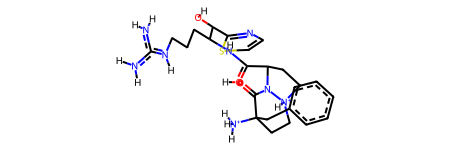

In [33]:
# zero DoF example
ligand_dinc_mol = load_ligand(lig_path)
rdkit_mol = ligand_dinc_mol._rdkit_molecule
rdkit_mol

In [34]:
ligand_dinc_mol.atoms

,number,rdkit_idx,rdkit_name,element,organic,charge,idx
molkit_unique_name,,,,,,,
C11,18,17.0,None,C,1,-0.0553,0
C22,19,18.0,None,C,1,0.0070,1
C33,20,19.0,None,C,1,0.0006,2
C4,21,20.0,None,C,1,0.0001,3
C5,22,21.0,None,C,1,0.0006,4
C6,23,22.0,None,C,1,0.0070,5
N17,13,12.0,None,N,1,-0.0611,6
N2,3,2.0,None,N,1,-0.1632,7
N3,4,3.0,None,N,1,0.0137,8


In [35]:
ligand_dinc_mol.bonds[ligand_dinc_mol.bonds.activeTors_==1]

,atom1_molkit_unique_name,atom2_molkit_unique_name,origin,bond_order,rdkit_idx,incycle_,hrotator_,amdbond_,possibleTors_,activeTors_,idx_atom1,idx_atom2
2,C7,C11,File,1,18.0,0,0,0,1,1,10,0
7,C9,N17,File,1,13.0,0,1,0,1,1,12,6
18,C9,C7,File,1,17.0,0,0,0,1,1,12,10
24,C14,C15,File,1,0.0,0,0,0,1,1,17,18
25,C15,O2,File,1,25.0,0,1,0,1,1,18,19
26,C15,N,File,1,27.0,0,0,0,1,1,18,21
28,N,CA,File,1,29.0,0,0,0,1,1,21,22
30,CA,C,File,1,30.0,0,0,0,1,1,22,23
31,CA,CB,File,1,39.0,0,0,0,1,1,22,25
32,C,O,File,1,31.0,0,1,0,1,1,23,24


In [36]:
from dinc_ensemble.parameters import DincFragParams, DINC_FRAGMENT_MODE

In [37]:
frag = DINCFragment(ligand_dinc_mol, DincFragParams(root_type=DINC_ROOT_TYPE.AUTO,
                                                    root_auto=DINC_ROOT_AUTO.H_BONDS,
                                                    frag_mode=DINC_FRAGMENT_MODE.MANUAL,
                                                    frag_new=1,
                                                    frag_size=2))

DINC Warning: unable to extract bond info from torsion node
DINC: selecting initial fragment to maximize condition
------------------------------------------------------
current root in consideration #0
with atoms [0, 1, 23, 25]
resulting initial fragment
[0, 1]
with 6 atoms
updating max fragment
current root in consideration #5
with atoms [24]
resulting initial fragment
[5, 0]
with 2 atoms
current root in consideration #9
with atoms [30]
resulting initial fragment
[8, 9]
with 1 atoms
current root in consideration #2
with atoms [13, 14, 15]
resulting initial fragment
[2, 1]
with 4 atoms
current root in consideration #10
with atoms [32, 33, 34, 35]
resulting initial fragment
[8, 10]
with 2 atoms
current root in consideration #4
with atoms [18, 19, 20, 21, 22]
resulting initial fragment
[4, 3]
with 0 atoms
current root in consideration #3
with atoms [17]
resulting initial fragment
[1, 3]
with 4 atoms
current root in consideration #8
with atoms [29, 31]
resulting initial fragment
[9, 8]
w

In [38]:
frag._split_to_fragments_()

LPO: allowed_bonds= backbone
addinghydrogens!
added  6  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_0  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_0
merged  6  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_0.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  6  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12

[17:02:17] Explicit valence for atom # 19 O, 3, is greater than permitted
[17:02:17] Explicit valence for atom # 24 O, 3, is greater than permitted


using std outputfilename  1a61_ligand_dof_12_frag_2.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_2  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_2
merged  1  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_2.pdbqt
LPO: allowed_bonds= backbone
addinghydrogens!
added  1  hy

[17:02:17] Explicit valence for atom # 24 O, 3, is greater than permitted
[17:02:18] Explicit valence for atom # 23 O, 3, is greater than permitted


LPO: allowed_bonds= backbone
addinghydrogens!
added  4  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_4  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_4
merged  4  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_4.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  4  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in

[17:02:18] Explicit valence for atom # 23 O, 3, is greater than permitted
[17:02:18] Explicit valence for atom # 23 O, 3, is greater than permitted


DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  7  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_5  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_5
merged  7  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_5.pdbqt
LPO: allowed_bonds= backbone
addinghydrogens!
added  7  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_6  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_6
merged  7  nonp

[17:02:18] Explicit valence for atom # 23 O, 3, is greater than permitted
[17:02:18] Explicit valence for atom # 12 O, 3, is greater than permitted


DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  7  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_8  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_8
merged  7  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_8.pdbqt
LPO: allowed_bonds= backbone
addinghydrogens!
added  4  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_9  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_9
merged  4  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_9.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence e

[17:02:18] Explicit valence for atom # 12 O, 3, is greater than permitted
[17:02:19] Explicit valence for atom # 12 O, 3, is greater than permitted


LPO: allowed_bonds= backbone
addinghydrogens!
added  4  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_10  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_10
merged  4  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_10.pdbqt
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Molkit molecule and RDKit molecule are inconsistent!
DINC Warning: Rdkit atom valence error!
DINCEnsemble warning: not all atoms were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINCEnsemble warning: not all bonds were mapped between the RDKit and MolKit molecules!
DINC Warning: unable to extract bond info from torsion node
LPO: allowed_bonds= backbone
addinghydrogens!
added  4  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger

[17:02:19] Explicit valence for atom # 12 O, 3, is greater than permitted


LPO: allowed_bonds= backbone
addinghydrogens!
added  3  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_1
merged  3  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_1.pdbqt
LPO: allowed_bonds= backbone
addinghydrogens!
added  3  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added gasteigercharges to  1a61_ligand_dof_12_frag_1
merged  3  nonpolar hydrogens
end of base class init
using std outputfilename  1a61_ligand_dof_12_frag_1.pdbqt
LPO: allowed_bonds= backbone
addinghydrogens!
added  3  hydrogens
merged  []  lonepairs
charges_to_add= gasteiger
in addCharges:mol.name= 1a61_ligand_dof_12_frag_1  and charges_to_add= gasteiger
self.chargeType= gasteiger
added 

In [39]:
frag0 = frag.split_frags[0]

In [40]:
frag1 = frag.split_frags[1]

In [41]:
frag1._molecule.bonds[(frag1._molecule.bonds["activeTors_"]==1) & (frag1._molecule.bonds["possibleTors_"]==1)]

,atom1_molkit_unique_name,atom2_molkit_unique_name,origin,bond_order,rdkit_idx,incycle_,hrotator_,amdbond_,possibleTors_,activeTors_,idx_atom1,idx_atom2,node
1,C9,N17,File,1,14.0,0,1,0,1,1,7,1,1
19,C15,O2,File,1,20.0,0,1,0,1,1,13,14,3


In [42]:
frag0._molecule.bonds[(frag0._molecule.bonds["activeTors_"]==1) & (frag0._molecule.bonds["possibleTors_"]==1)]

,atom1_molkit_unique_name,atom2_molkit_unique_name,origin,bond_order,rdkit_idx,incycle_,hrotator_,amdbond_,possibleTors_,activeTors_,idx_atom1,idx_atom2
1,C9,N17,File,1,13.0,0,1,0,1,1,7,1
12,C9,C7,File,1,17.0,0,0,0,1,1,7,5


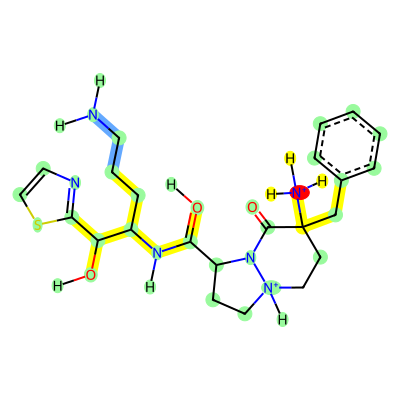

In [54]:
draw_fragment(frag.split_frags[11])

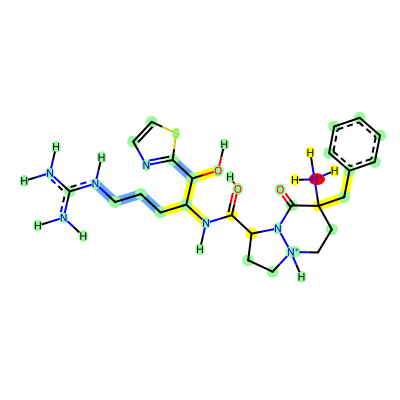

In [31]:
draw_fragment(frag.split_frags[2])